In [ ]:
## Data analysis initial steps
#

In [104]:
## Step 1 : Import pre-libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
## Step 2 : Import dataset
#
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Country,Age,Salary,Purchased,L1
0,France,44.0,72000.0,No,NaN
1,Spain,27.0,48000.0,Yes,NaN
2,Germany,30.0,54000.0,No,2.0
3,Spain,38.0,61000.0,No,NaN
4,Germany,40.0,NaN,Yes,NaN


In [106]:
## Step 3 : General Information of dataset
# more information - column names, non-null count, data type of each column
# memory usage, index range
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  9 non-null      object 
 4   L1         2 non-null      float64
dtypes: float64(3), object(2)
memory usage: 528.0+ bytes


In [107]:
# less information
# without table structure
#
dataset.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 5 entries, Country to L1
dtypes: float64(3), object(2)
memory usage: 528.0+ bytes


In [108]:
## Step 4 : Statistical Information of dataset
# for number containing columns only
#
dataset.describe()

,Age,Salary,L1
count,9.000000,9.000000,2.000000
mean,38.777778,63777.777778,3.000000
std,7.693793,12265.579662,1.414214
min,27.000000,48000.000000,2.000000
25%,35.000000,54000.000000,2.500000
50%,38.000000,61000.000000,3.000000
75%,44.000000,72000.000000,3.500000
max,50.000000,83000.000000,4.000000


In [109]:
# for other types of columns
# 
dataset.describe(include = "O")

,Country,Purchased
count,10,9
unique,3,2
top,France,No
freq,4,5


In [110]:
## Step 5 : Missing data management
# quick way to find null value count and percentage
# 
dataset.isna().sum()

Country      0
Age          1
Salary       1
Purchased    1
L1           8
dtype: int64

In [111]:
# in percentage
#
nan_percentage = [(clm_names, dataset[clm_names].isna().mean() * 100) for clm_names in dataset]
nan_percentage = pd.DataFrame(nan_percentage, columns = ['columns', 'nan_percentages'])
nan_percentage

,columns,nan_percentages
0,Country,0.0
1,Age,10.0
2,Salary,10.0
3,Purchased,10.0
4,L1,80.0


In [112]:
# set threshod and discard the columns with crossing threshod
# drop columns based on percentage of missing values
#
dataset.drop(columns = ['L1'], axis = 1, inplace = True)
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [113]:
# detailed information of checking null values
# run each statement in different blocks to get its execution results
# ---------------------------------------------
# isnull()
# play True is missing value in dataframe
dataset.isnull()

# isnull()
# column status for null values
#
dataset.isnull().any()

# isnull() 
# column wise count
dataset.isnull().sum()

# isnull()
# entire null count in dataframe
#
dataset.isnull().sum().sum()
# # ---------------------------------------------


# ---------------------------------------------
# isna()
# see all null values as marked True in dataframe
#
dataset.isna()

# isna()
# column-wise count
#
dataset.isna().sum()

# isna()
# total null value count of entire dataset
#
dataset.isna().sum().sum()
# ---------------------------------------------


# ---------------------------------------------
# not_null()
# null values marked as False else True
#
dataset.notnull()

# not_null()
# not null count of each column
#
dataset.notnull().sum()

# not_null()
# total not null count in dataframe
#
dataset.notnull().sum().sum()
# ---------------------------------------------


# ---------------------------------------------
# not_na()
# null values marked as False else True
#
dataset.notna()


# not_na()
# not null count of each column
#
dataset.notna().sum()


# not_na()
# total not null values of dataframe
#
dataset.notna().sum().sum()
# ---------------------------------------------


# ---------------------------------------------
# count of missing values of each column
# 
len(dataset) - dataset.count()
# ---------------------------------------------

Country      0
Age          1
Salary       1
Purchased    1
dtype: int64

In [114]:
# handle missing values
# ----------------------------------------------
# dropna()
# if any row containing atleast one null values
dataset.dropna()

# dropna()
# all element of rows are null so drop that row
#
dataset.dropna(how = 'all')

# dropna()
# same as dropna()
#
dataset.dropna(how = 'any')

# dropna() for columns
# if column contains all values null then drop it
dataset.dropna(axis = 1, how = 'all')

# dropna() 
# if column contains any column values as null then drop than columns
#
dataset.dropna(axis = 1, how = 'any')
# ----------------------------------------------

# ----------------------------------------------
# replace()
# all dataframe null values 
# with 10 including string and other datatypes
#
dataset.replace(np.nan, 10)

# replace by each column
#
dataset.Age.replace(np.nan, 20)

# replace with mean, median or mode
# with mean

# with median
#
dataset.Age.replace(np.nan, dataset.Age.median())

# mode is same as most frequent element
#
dataset.Age.replace(np.nan, dataset.Age.mode()[0])
# ----------------------------------------------


# ----------------------------------------------
# fillna()
# with specific value
#
dataset.Age.fillna(100)

# fillna()
# with previous record value
#
dataset.Age.fillna(method = 'pad')

# fillna()
# with after record value
#
dataset.Age.fillna(method = 'bfill')

# fillna() with mean, median and mode
#

dataset.Age.fillna(dataset.Age.mean())


dataset.Age.fillna(dataset.Age.median())

dataset.Age.fillna(dataset.Age.mode())

# for there datatype than numeric
# using mode
dataset.Purchased.fillna(dataset.Purchased.mode()[0])
# ----------------------------------------------


# ----------------------------------------------
# using interpolate()
# if previous data not found in column so keep them as NaN
#
dataset.interpolate(method ='linear', limit_direction ='forward')
# ----------------------------------------------


# ----------------------------------------------
# Using SimpleImputer()
# we are using this method to fill null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
dataset.Age = imputer.fit_transform(dataset[['Age']])

# strategy options
# median, mode
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
dataset.Salary = imputer.fit_transform(dataset[['Salary']])
# mode or most_frequent
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
dataset.Purchased = imputer.fit_transform(dataset[['Purchased']])

# constant + fill_value 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 37)
imputer.fit_transform(dataset[['Age']])
# ----------------------------------------------

array([[44.        ],
       [27.        ],
       [30.        ],
       [38.        ],
       [40.        ],
       [35.        ],
       [38.77777778],
       [48.        ],
       [50.        ],
       [37.        ]])

In [115]:
## Step 6 : Check and change datatype
#
dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [116]:
# change data type
#
dataset.Age = dataset.Age.astype('int64')
dataset.dtypes

Country       object
Age            int64
Salary       float64
Purchased     object
dtype: object

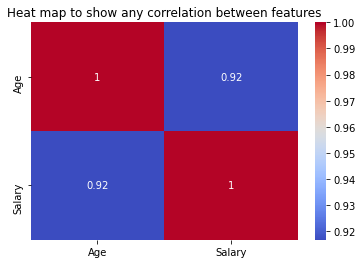

In [117]:
## Step 7 : Heatmap
# to check correlation between features
#
features = dataset.columns.to_list()
sns.heatmap(dataset[features].corr(), 
                cmap = 'coolwarm',
                annot = True)

plt.title("Heat map to show any correlation between features")
plt.xlabel("")
plt.ylabel("")
plt.show()
plt.close()

In [118]:
# Step 8 : Calculate measure of central dependency
# Mean
print("The average value of each columns are below.")
print("Mean\n{}\n".format(dataset.iloc[:, [1, 2]].mean()))

# Median
print("The middle value of all the columns are below.")
print("Median\n{}\n".format(dataset.iloc[:, [1, 2]].median()))

# Mode
print("The most common value of each column are below.")
print("Mode\n{}\n".format(dataset.mode().iloc[0]))

The average value of each columns are below.
Mean
Age          38.7
Salary    63500.0
dtype: float64

The middle value of all the columns are below.
Median
Age          38.0
Salary    61000.0
dtype: float64

The most common value of each column are below.
Mode
Country      France
Age              38
Salary        61000
Purchased        No
Name: 0, dtype: object



In [87]:
## Step 9 : Measure of dispersion
# Varience
print("Variance\n{}\n".format(dataset.var()))
print("""
The variance is small
- It means all column datapoints are tend to close together and close to mean.
If variance is big
- It means this column datapoints are spread-out with respect to each other and with respect to mean.
""")

# Standard deviation
print("Standard deviation\n{}\n".format(dataset.std()))
print("""
Standard deviation is small.
- It means data points are tightky clustered around mean.
Standard deviation is big.
- It means data points widely spread as compare to other columns.
""")

Variance
Age       5.267778e+01
Salary    1.345000e+08
dtype: float64


The variance is small
- It means all column datapoints are tend to close together and close to mean.
If variance is big
- It means this column datapoints are spread-out with respect to each other and with respect to mean.

Standard deviation
Age           7.257946
Salary    11597.413505
dtype: float64


Standard deviation is small.
- It means data points are tightky clustered around mean.
Standard deviation is big.
- It means data points widely spread as compare to other columns.



In [120]:
## Step 10 : Calculate moments
#
from scipy.stats import kurtosis
from scipy.stats import skew
# Skewness
print("Skewness\n{}\n".format(dataset.skew()))
skews = dataset.skew()
sk_list = list()

for i in skews:
    if(i == 0):
        sk_list.append("Normally distributed")
    elif(i < 0):
        sk_list.append("Negatively distributed")
    elif(i>0):
        sk_list.append("Positively distributed")
skewness_result = pd.Series(sk_list)
skewness_result.index = dataset.iloc[:, [1, 2]].mean().index
print("The details informaton about skewness below.")
print(skewness_result)

Skewness
Age       0.029773
Salary    0.489363
dtype: float64

The details informaton about skewness below.
Age       Positively distributed
Salary    Positively distributed
dtype: object


In [121]:
# kurtosis
#
print("Kurtosis\n{}\n".format(dataset.kurtosis()))
kur = dataset.kurtosis()
sk_list = list()
for i in kur:
    if(i == 0):
        sk_list.append("Mesokurtic")
    elif(i < 0):
        sk_list.append("Leptokurtic")
    elif(i>0):
        sk_list.append("Platykurtic")
kurtosis_result = pd.Series(sk_list)
kurtosis_result.index = dataset.iloc[:, [1, 2]].mean().index
print("The details informaton about kurtosis below.")
print(kurtosis_result)

Kurtosis
Age      -0.466385
Salary   -0.816039
dtype: float64

The details informaton about kurtosis below.
Age       Leptokurtic
Salary    Leptokurtic
dtype: object


In [122]:
## Step 11 : Handle categorical values
# using replace dictionary
#
maping = {'Purchased' : {'Yes': 1, 'No': 0}}
dataset = dataset.replace(maping)
dataset

,Country,Age,Salary,Purchased
0,France,44,72000.0,0
1,Spain,27,48000.0,1
2,Germany,30,54000.0,0
3,Spain,38,61000.0,0
4,Germany,40,61000.0,1
5,France,35,58000.0,1
6,Spain,38,52000.0,0
7,France,48,79000.0,1
8,Germany,50,83000.0,0
9,France,37,67000.0,0


In [123]:
# using label encoding
# 
from sklearn.preprocessing import LabelEncoder

# store ecoding result for future understanding
# using dictionary
# name_encoded_labels = list(dataset.Purchased)
# dataset.Purchased = encoder.fit_transform(dataset.Purchased)
# name_encoded_labels_dict = dict(zip(list(dataset.Purchased), encoding_results))
# print(name_encoded_labels_dict)
# or 
# use inverse_transform()
# encoder.inverse_transform(encoder.fit_transform(dataset.Purchased))

# encode Country column
#
encoder = LabelEncoder()
name_encoded_labels = list(dataset.Country)
dataset.Country = encoder.fit_transform(dataset.Country)
name_encoded_labels_dict = dict(zip(list(dataset.Country), name_encoded_labels))
print(name_encoded_labels_dict)

# to check encoding classes
#
print(encoder.classes_)

{0: 'France', 2: 'Spain', 1: 'Germany'}
['France' 'Germany' 'Spain']


In [124]:
# using onehotencoder to create dummpy variable
#
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One for independent variable
clm_x = ColumnTransformer([("Combine",
                            OneHotEncoder(),[0])], 
                            remainder="passthrough")
dataset = clm_x.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns = ['country_France', 'country_Germany','country_Spain', 'Age', 'Salary', 'Purchased']
dataset.head()

In [102]:
# or
# using pandas to create dummpy variable
#
pd.get_dummies(dataset, prefix = 'country', prefix_sep='_', columns = ['Country'])

,Age,Salary,Purchased,country_France,country_Germany,country_Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,0,0,1
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,NaN,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,NaN,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,NaN,1,0,0


In [139]:
# label encoder and onehotencoder so that 
# inverse onehotencoding to keep track of encoding
#
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

dataset = pd.read_csv('dataset.csv')

data = dataset.Country.to_list()
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['France' 'Spain' 'Germany' 'Spain' 'Germany' 'France' 'Spain' 'France'
 'Germany' 'France']
[0 2 1 2 1 0 2 0 1 0]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
['France']


In [ ]:
# other encoding
# ordinal encoding
# from sklearn.preprocessing import OrdinalEncoder 
# ord1 = OrdinalEncoder() 
# ord1.fit([df['ord_2']]) 
# df["ord_2"]= ord1.fit_transform(df[["ord_2"]])  

#
# binary encoding
# from category_encoders import BinaryEncoder  
# encoder = BinaryEncoder(cols =['ord_2'])  
# newdata = encoder.fit_transform(df['ord_2']) 
# df = pd.concat([df, newdata], axis = 1)  
# df = df.drop(['ord_2'], axis = 1) 

# 
# hash encoding
# from sklearn.feature_extraction import FeatureHasher 
# h = FeatureHasher(n_features = 3, input_type ='string')  
# hashed_Feature = h.fit_transform(df['nom_0']) 
# hashed_Feature = hashed_Feature.toarray() 
# df = pd.concat([df, pd.DataFrame(hashed_Feature)], axis = 1) 

#
# effect encoding
# import category_encoders as ce 
# encoder = ce.sum_coding.SumEncoder(cols = 'Country',
#                                 verbose = False) 
# encoder.fit_transform(data)

In [ ]:
## State problem statement 
#


In [ ]:
## Visualize
#

In [140]:
## Convert to python code
#
!jupyter nbconvert --to script analysis_steps.ipynb

[NbConvertApp] Converting notebook analysis_steps.ipynb to script
[NbConvertApp] Writing 11740 bytes to analysis_steps.py


In [ ]:
## End
#